# Task 2  Stock Market Prediction And Forecasting Using Stacked LSTM [LGMVIP]
Dataset:-https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# Importing the libraries

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [5]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

# Importing Dataset

In [6]:
data = pd.read_csv("stockdata.csv")

In [7]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [8]:
data.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


# Used to view some basic statistical details

In [9]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


# No of rows and columns

In [10]:
data.shape

(2035, 8)

# Checking for null values

In [11]:
data.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


# Returns the number of missing values in dataset

In [12]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

# Returns the number of colum

In [13]:

data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

# Returns the number of unique values for each column

In [14]:

data.nunique()

Date                    2035
Open                    1165
High                    1257
Low                     1263
Last                    1268
Close                   1313
Total Trade Quantity    2034
Turnover (Lacs)         2030
dtype: int64

In [15]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [16]:
df = data.reset_index()['Open']
df

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

Text(0.5, 1.0, 'Open')

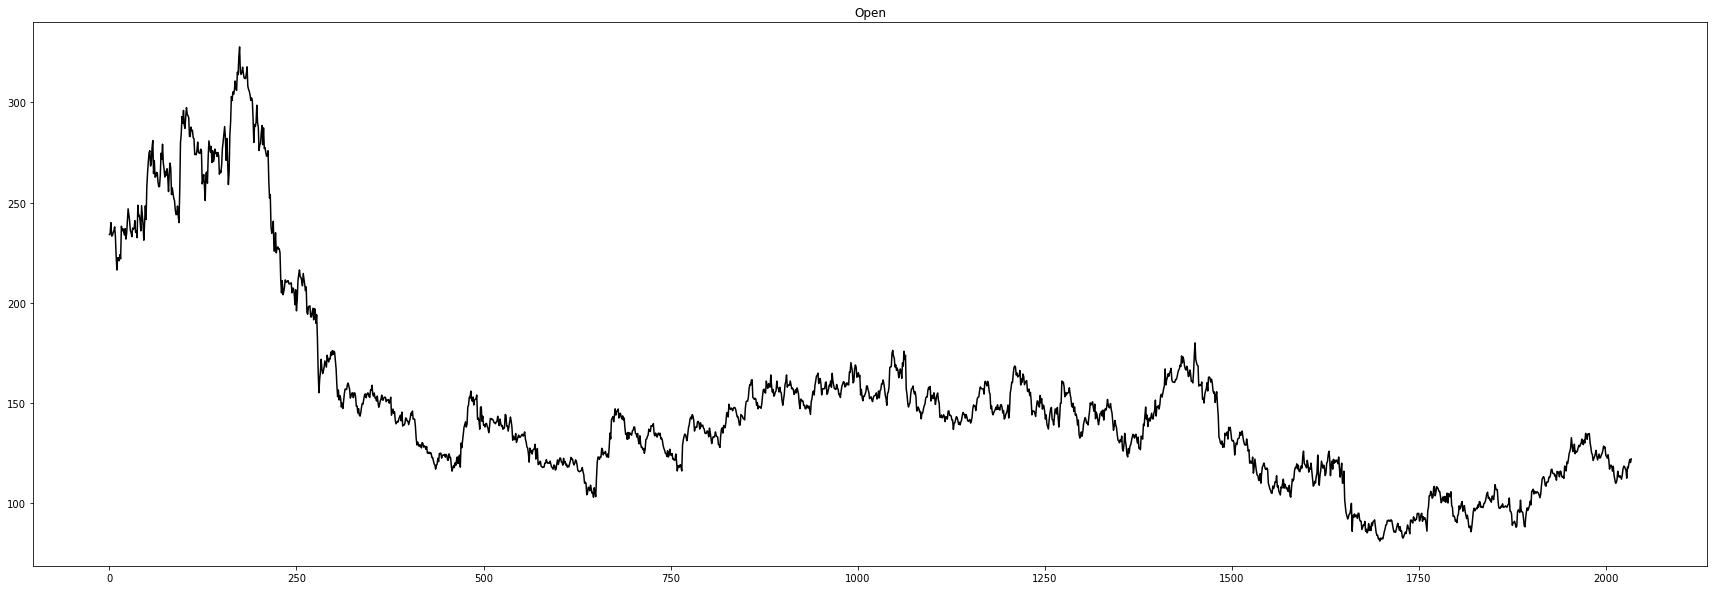

In [17]:
plt.subplots(figsize = (30,10))
plt.plot(df, color="black")
plt.title('Open')

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:

scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
df.shape

(2035, 1)

In [20]:
print(df)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


# Spliting the data into training and testing

In [21]:
training_size = int(len(df) * 0.75)
testing_size = len(df) - training_size
train_data, test_data = df[0 :training_size, :], df[training_size : len(df), :1]
training_size, testing_size

(1526, 509)

In [22]:
train_data, test_data

(array([[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.18491484],
        [0.15774534],
        [0.16180049]]),
 array([[0.15774534],
        [0.15774534],
        [0.16991079],
        [0.13746959],
        [0.14963504],
        [0.16605839],
        [0.15369019],
        [0.14152474],
        [0.13341444],
        [0.13260341],
        [0.12368208],
        [0.12246553],
        [0.13625304],
        [0.11719384],
        [0.13746959],
        [0.15004055],
        [0.15308191],
        [0.15794809],
        [0.15186537],
        [0.14557989],
        [0.14497161],
        [0.14801298],
        [0.14476886],
        [0.11719384],
        [0.11151663],
        [0.10563666],
        [0.10218978],
        [0.09712084],
        [0.09691809],
        [0.11131387],
        [0.10644769],
        [0.11111111],
        [0.1202352 ],
        [0.11922141],
        [0.13219789],
        [0.10969181],
        [0.11232766],
        [0.10097324],
        [0.097120

# Convert array of values into dataset

In [23]:
def create_dataset(dataset, time_step=1):
  train_X, train_Y = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    train_X.append(a)
    train_Y.append(dataset[i+time_step, 0])
  return np.array(train_X),np.array(train_Y)

In [24]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# Reshape the input to be [samples, time steps, features] which is the requirement of LSTM

In [25]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [27]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 13s 211ms/step - loss: 0.0276 - val_loss: 0.0078
Epoch 2/100
23/23 [==============================] - 4s 183ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 3/100
23/23 [==============================] - 5s 231ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 6s 245ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/100
23/23 [==============================] - 6s 241ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 6/100
23/23 [==============================] - 6s 244ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/100
23/23 [==============================] - 5s 239ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 6s 251ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 5s 233ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
23/23 [==============================] - 5s 232ms/step - loss: 0.0012 - val_l

# Plot baseline

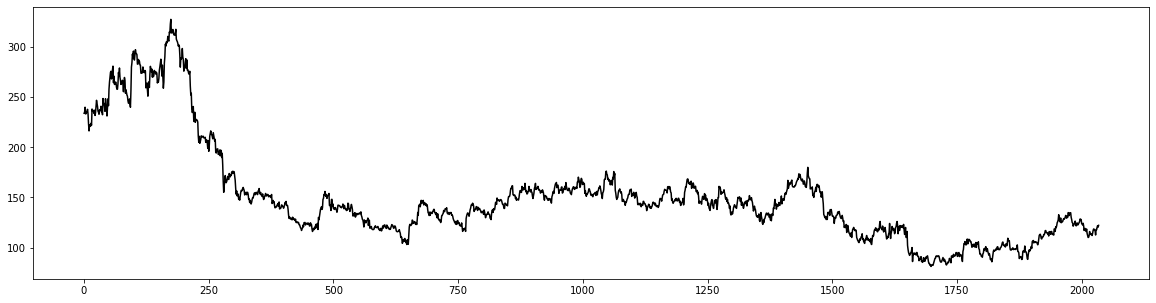

In [33]:
plt.subplots(figsize=(20,5))
plt.plot(scaler.inverse_transform(df), color = "black")
plt.show()

# Training prediction and testing prediction

NameError: name 'trainPredictPlot' is not defined

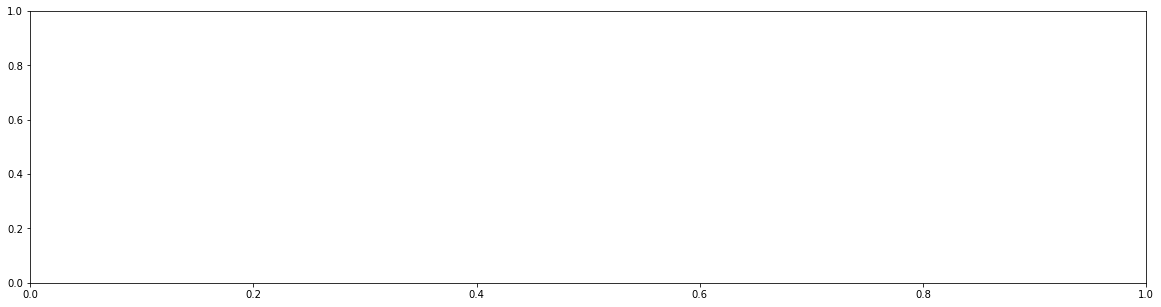

In [34]:
plt.subplots(figsize=(20,5))
plt.plot(trainPredictPlot,color ='red')
plt.plot(testPredictPlot, color ='blue')
plt.show()

NameError: name 'trainPredictPlot' is not defined

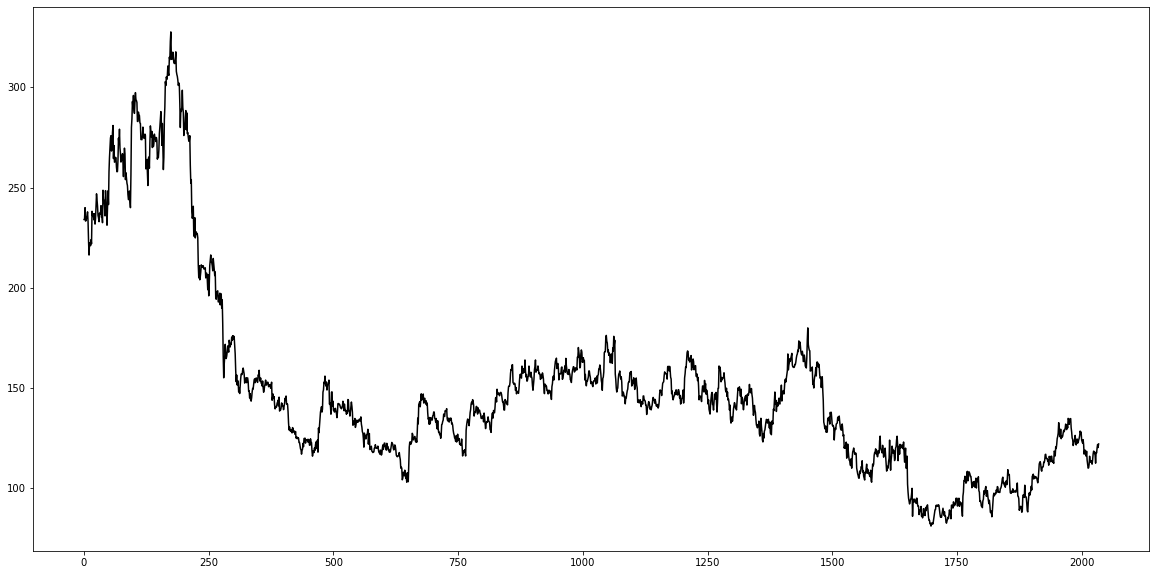

In [35]:
plt.subplots(figsize=(20,10))
plt.plot(scaler.inverse_transform(df), color= 'black')
plt.plot(trainPredictPlot, color='red')
plt.plot(testPredictPlot, color='blue')

In [ ]:
print("Length of test data :", len(test_data))

In [36]:

test_data.shape

(509, 1)

# Taking previous 100 days data from test data prediction of future data

In [37]:
x_ip = test_data[409:].reshape(1,-1)
x_ip.shape

(1, 100)

In [38]:

temp_ip = list(x_ip)
temp_ip = temp_ip[0].tolist()

In [45]:
lst_output=[]
n_steps=100

future_Days=15

i=0

while(i100):
    x_ip = np.array(temp_ip[1:])
    print("Day {} input {}".format(i,x_ip))

    x_ip = x_ip.reshape(1, -1)
    x_ip = x_ip.reshape(1, n_steps, 1)
    yhat = model.predict(x_ip, verbose=0)
    print("Day {} output {}\n".format(i,yhat))

    temp_ip.extend(yhat[0].tolist())
    temp_ip = temp_ip[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
else:
    x_ip = x_ip.reshape(1, n_steps, 1)
    yhat = model.predict(x_ip, verbose=0)
    print(yhat[0])
    temp_ip.extend(yhat[0].tolist())
    print(len(temp_ip))
    lst_output.extend(yhat.tolist())
    i=i+1


NameError: name 'i100' is not defined

In [46]:
day_new = np.arange(1,101)
day_pred = np.arange(101,116)

fd= df.tolist()
fd.extend(lst_output)

In [42]:
len(df)

2035

In [43]:
2035-100

1935